# Prediction of New York Housing Prices in 2015

In this notebook Ridge regression and Lasso regression is done to assess the accuracy of predicting house prices. The objective here is to assess wether the image data from sales_data_2015_DF-inception-conv.csv shows a big increase in predictive power. First the data from sales_data_2015.csv is explored in a data analysis. Then progressively features are scaled appropriately using scalers. This also goes for the image dataset sales_data_2015_DF-inception-conv.csv. The idea is that if you take a photo from the house from above that you can enhance predictive power in the price. After this categorical variables are made into dummies. 

Lastly the data is split into a train, validation and test set. It is then analysed using cross fold validation. A noticeable conclusion is that Ridge is seemingly having more power with a R^2 score of ~0.42 oppossed to Lasso's ~0.34. Both scores predictively are rather low. It is observed that even with a very low alpha of 0.01 a lot of features, especially those of the image dataset get penalized to 0 in Lasso regression. It can be said that so many features that add almost no value are a poor selection of features and that the image data's predictive power is rather low.

data is available here:  https://onedrive.live.com/?id=DF3D4CFD086B9DF1%21231&cid=DF3D4CFD086B9DF1

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(style='white', context='notebook', palette='deep') 
import matplotlib.style as style
style.use('fivethirtyeight')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap, colorConverter, LinearSegmentedColormap
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('sales_data_2015.csv', header=0)
df[:5]


,Unnamed: 0,Sale_id,bbl_id,year,borough,bldg_ctgy,tax_cls_p,block,lot,easmnt,...,land_sqft,tot_sqft,yr_built,tax_cls_s,bldg_cls_s,sale_date,price,usable,long,lat
0,0,1,2290528,2015,2,01 ONE FAMILY DWELLINGS,1,2905,28,NaN,...,4750,2619,1899,1,A9,8/7/2015,0,N,-73.901338,40.841229
1,1,2,2290528,2015,2,01 ONE FAMILY DWELLINGS,1,2905,28,NaN,...,4750,2619,1899,1,A9,8/7/2015,0,N,-73.901338,40.841229
2,2,3,230352,2015,2,01 ONE FAMILY DWELLINGS,1,3035,2,NaN,...,1287,2528,1899,1,S1,12/18/2015,0,N,-73.898331,40.848648
3,3,4,2303936,2015,2,01 ONE FAMILY DWELLINGS,1,3039,36,NaN,...,2500,2452,1910,1,S1,8/18/2015,0,N,-73.893338,40.856136
4,4,5,2303936,2015,2,01 ONE FAMILY DWELLINGS,1,3039,36,NaN,...,2500,2452,1910,1,S1,7/1/2015,400000,Y,-73.893338,40.856136


In [3]:
dfpics = pd.read_csv('sales_data_2015_DF-inception-conv.csv', header=0)


In [4]:
df = pd.merge(df, dfpics, on='Sale_id')

In [5]:
df[:5]

,Unnamed: 0_x,Sale_id,bbl_id_x,year,borough,bldg_ctgy,tax_cls_p,block,lot,easmnt,...,22,23,24,25,26,27,28,29,30,31
0,0,1,2290528,2015,2,01 ONE FAMILY DWELLINGS,1,2905,28,NaN,...,0.600213,-0.493792,-0.047002,-0.092415,0.427163,0.688372,-0.549481,-0.538056,0.358792,-0.103146
1,1,2,2290528,2015,2,01 ONE FAMILY DWELLINGS,1,2905,28,NaN,...,0.600213,-0.493792,-0.047002,-0.092415,0.427163,0.688372,-0.549481,-0.538056,0.358792,-0.103146
2,2,3,230352,2015,2,01 ONE FAMILY DWELLINGS,1,3035,2,NaN,...,0.502646,-0.414158,-0.037535,-0.060672,0.358382,0.585332,-0.458778,-0.447776,0.301268,-0.086599
3,3,4,2303936,2015,2,01 ONE FAMILY DWELLINGS,1,3039,36,NaN,...,0.503530,-0.413901,-0.038112,-0.066762,0.358489,0.580582,-0.461086,-0.449793,0.301751,-0.086144
4,4,5,2303936,2015,2,01 ONE FAMILY DWELLINGS,1,3039,36,NaN,...,0.503530,-0.413901,-0.038112,-0.066762,0.358489,0.580582,-0.461086,-0.449793,0.301751,-0.086144


In [6]:
df.columns

Index(['Unnamed: 0_x', 'Sale_id', 'bbl_id_x', 'year', 'borough', 'bldg_ctgy',
       'tax_cls_p', 'block', 'lot', 'easmnt', 'bldg_cls_p', 'address', 'apt',
       'zip', 'res_unit', 'com_unit', 'tot_unit', 'land_sqft', 'tot_sqft',
       'yr_built', 'tax_cls_s', 'bldg_cls_s', 'sale_date', 'price', 'usable',
       'long', 'lat', 'Unnamed: 0_y', 'bbl_id_y', '0', '1', '2', '3', '4', '5',
       '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
       '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29',
       '30', '31'],
      dtype='object')

In [7]:
# Filter usable columns
#dfreg1 = df[['price', 'borough', 'tax_cls_s','yr_built','tot_sqft','land_sqft', 'tot_unit', 'com_unit', 'res_unit', 'bldg_ctgy','usable']]
dfreg1 = df[df['usable'] == "Y"]
dfreg2 = df.drop(columns=['block','lot','easmnt','bldg_cls_p','Unnamed: 0_x', 'Sale_id', 'bbl_id_x', 'year', 'tax_cls_p', 'address', 'apt', 'zip', 'bldg_cls_s', 'sale_date', 'usable','long','lat','Unnamed: 0_y', 'bbl_id_y'])

In [8]:
# Filter for houses between 120.000$ and 3.000.000$
# Anything listed for less is typically not a 'house' 
#dfreg2 = dfreg1[['price', 'borough', 'tax_cls_s','yr_built','tot_sqft','land_sqft', 'tot_unit', 'com_unit', 'res_unit', 'bldg_ctgy']]
dfreg2['bldg_ctgy'] = dfreg2['bldg_ctgy'].astype(str)
dfreg2['borough'] = dfreg2['borough'].astype(str)
dfreg2 = dfreg2[(dfreg2['price'] > 120000) & (dfreg2['price'] < 3000000)]

In [9]:
dfreg2.shape

(49788, 42)

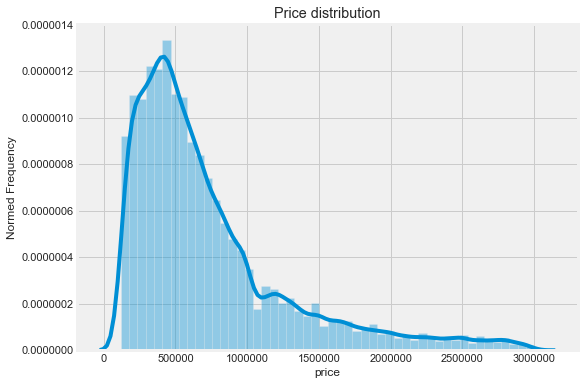

In [10]:
# Distribution of prices
# Seems like a normal distribution except for the tail end of high values
plt.figure(figsize=(8,6))

# Plot the data and configure the settings
sns.distplot(dfreg2['price'])
plt.title('Price distribution')
plt.ylabel('Normed Frequency')
plt.show()

In [11]:
# Applying scaler to price
dfreg2['price'] = RobustScaler().fit_transform(np.log(dfreg2['price']).values.reshape(-1,1))


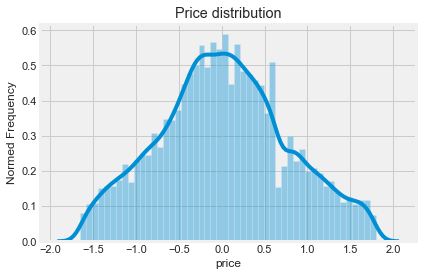

In [12]:
# Price seems like a normal distribution once the Robustscaler is applied
sns.distplot(dfreg2['price'])
plt.title('Price distribution')
plt.ylabel('Normed Frequency')
plt.show()

In [13]:
dfreg2[['yr_built', 'tot_sqft', 'land_sqft', 'tot_unit', 'com_unit', 'res_unit']] = dfreg2[['yr_built', 'tot_sqft', 'land_sqft', 'tot_unit', 'com_unit', 'res_unit']] + 1

# Take the log and standardise
#data_model['RESIDENTIAL UNITS'] = RobustScaler().fit_transform(np.log(data_model['RESIDENTIAL UNITS']).reshape(-1,1))
(dfreg2 == 0).columns.value_counts()
dfreg2.astype(bool).sum(axis=0)


borough      49788
bldg_ctgy    49788
res_unit     49788
com_unit     49788
tot_unit     49788
land_sqft    49788
tot_sqft     49788
yr_built     49788
tax_cls_s    49788
price        49579
0            47728
1            47728
2            47728
3            47728
4            47728
5            47728
6            47728
7            47728
8            47728
9            47728
10           47728
11           47728
12           47728
13           47728
14           47728
15           47728
16           47728
17           47728
18           47728
19           47728
20           47728
21           47728
22           47728
23           47728
24           47728
25           47728
26           47728
27           47728
28           47728
29           47728
30           47728
31           47728
dtype: int64

In [14]:
# Scaling features to be used
dfreg2[['yr_built', 'tot_sqft', 'land_sqft', 'tot_unit', 'com_unit', 'res_unit']] = RobustScaler().fit_transform(np.log(dfreg2[['yr_built', 'tot_sqft', 'land_sqft', 'tot_unit', 'com_unit', 'res_unit']]))

In [15]:
# Scaling the image data with the RobustScaler
dfreg2[['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31']]= RobustScaler().fit_transform(dfreg2[['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31']])


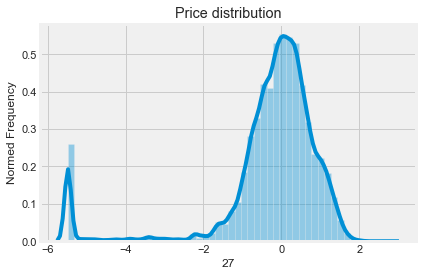

In [16]:
sns.distplot(dfreg2['27'])
plt.title('Price distribution')
plt.ylabel('Normed Frequency')
plt.show()

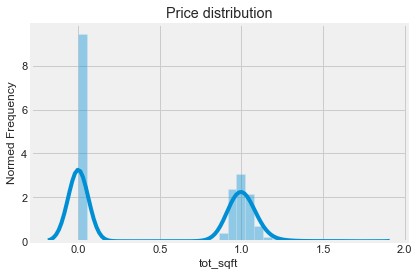

In [17]:
sns.distplot(dfreg2['tot_sqft'])
plt.title('Price distribution')
plt.ylabel('Normed Frequency')
plt.show()

In [18]:
# columns to be used 
dfreg2.columns

Index(['borough', 'bldg_ctgy', 'res_unit', 'com_unit', 'tot_unit', 'land_sqft',
       'tot_sqft', 'yr_built', 'tax_cls_s', 'price', '0', '1', '2', '3', '4',
       '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
       '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29',
       '30', '31'],
      dtype='object')

In [19]:
# create dummies out of categorical variables regarding housing type
finalDF = pd.get_dummies(dfreg2[['borough','bldg_ctgy']])

In [20]:
finalDF = pd.concat([finalDF, dfreg2], axis=1, sort=False)

In [21]:
finalDF.columns

Index(['borough_1', 'borough_2', 'borough_3', 'borough_4', 'borough_5',
       'bldg_ctgy_01  ONE FAMILY DWELLINGS',
       'bldg_ctgy_02  TWO FAMILY DWELLINGS',
       'bldg_ctgy_03  THREE FAMILY DWELLINGS',
       'bldg_ctgy_04  TAX CLASS 1 CONDOS',
       'bldg_ctgy_05  TAX CLASS 1 VACANT LAND',
       'bldg_ctgy_06  TAX CLASS 1 - OTHER',
       'bldg_ctgy_07  RENTALS - WALKUP APARTMENTS',
       'bldg_ctgy_08  RENTALS - ELEVATOR APARTMENTS',
       'bldg_ctgy_09  COOPS - WALKUP APARTMENTS',
       'bldg_ctgy_10  COOPS - ELEVATOR APARTMENTS',
       'bldg_ctgy_11  SPECIAL CONDO BILLING LOTS',
       'bldg_ctgy_11A CONDO-RENTALS',
       'bldg_ctgy_12  CONDOS - WALKUP APARTMENTS',
       'bldg_ctgy_13  CONDOS - ELEVATOR APARTMENTS',
       'bldg_ctgy_14  RENTALS - 4-10 UNIT',
       'bldg_ctgy_15  CONDOS - 2-10 UNIT RESIDENTIAL',
       'bldg_ctgy_16  CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT',
       'bldg_ctgy_17  CONDO COOPS',
       'bldg_ctgy_18  TAX CLASS 3 - UNTILITY PROPERTIES'

In [22]:
finalDF.dtypes
#sum(finalDF.duplicated(finalDF.columns))
finalDF = finalDF.drop_duplicates(finalDF.columns, keep='last')
sum(finalDF.duplicated(finalDF.columns))
finalDF = finalDF.drop(columns=['borough','bldg_ctgy'])
reg1_X = finalDF.drop('price', axis=1).values 
reg1_Y = finalDF['price']

In [23]:
from sklearn.preprocessing import MinMaxScaler
# Split the dataset into training, validation and test sets, using 60%, 20%, and 20% splits.
# Your code goes here.
X_trainval, X_test, y_trainval, y_test = train_test_split(reg1_X, reg1_Y, random_state=1, test_size=0.10)

X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1, test_size=0.1111111)

print("Size of training set: {}   size of validation set: {}   size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

Size of training set: 38847   size of validation set: 4856   size of test set: 4856



In [24]:
finalDF.columns

Index(['borough_1', 'borough_2', 'borough_3', 'borough_4', 'borough_5',
       'bldg_ctgy_01  ONE FAMILY DWELLINGS',
       'bldg_ctgy_02  TWO FAMILY DWELLINGS',
       'bldg_ctgy_03  THREE FAMILY DWELLINGS',
       'bldg_ctgy_04  TAX CLASS 1 CONDOS',
       'bldg_ctgy_05  TAX CLASS 1 VACANT LAND',
       'bldg_ctgy_06  TAX CLASS 1 - OTHER',
       'bldg_ctgy_07  RENTALS - WALKUP APARTMENTS',
       'bldg_ctgy_08  RENTALS - ELEVATOR APARTMENTS',
       'bldg_ctgy_09  COOPS - WALKUP APARTMENTS',
       'bldg_ctgy_10  COOPS - ELEVATOR APARTMENTS',
       'bldg_ctgy_11  SPECIAL CONDO BILLING LOTS',
       'bldg_ctgy_11A CONDO-RENTALS',
       'bldg_ctgy_12  CONDOS - WALKUP APARTMENTS',
       'bldg_ctgy_13  CONDOS - ELEVATOR APARTMENTS',
       'bldg_ctgy_14  RENTALS - 4-10 UNIT',
       'bldg_ctgy_15  CONDOS - 2-10 UNIT RESIDENTIAL',
       'bldg_ctgy_16  CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT',
       'bldg_ctgy_17  CONDO COOPS',
       'bldg_ctgy_18  TAX CLASS 3 - UNTILITY PROPERTIES'

In [25]:
def rmse(y_test,y_pred):
      return np.sqrt(mean_squared_error(y_test,y_pred))

In [34]:
lr = LinearRegression().fit(X_train,y_train)
# Print the parameters theta
alpha = 0.01
reg = Ridge(alpha).fit(X_train, y_train)
#print("lr.coef_: {}".format(lr.coef_))
#print("lr.intercept_: {}".format(lr.intercept_))

#rmse = np.sqrt(mean_squared_error(y_test_s, y_pred_s))
#print("Root Mean Squared Error: {}".format(rmse))
y_pred_ridge = reg.predict(X_test)

cv_scores_linreg = cross_val_score(reg, X_train, y_train, cv=5)
print("R^2 valid score: {}".format(reg.score(X_train, y_train)))
print("R^2 valid score: {}".format(reg.score(X_valid, y_valid)))
print("R^2 test score: {}".format(reg.score(X_test, y_test)))
print('Coefficients:\n', reg.coef_)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores_linreg)))
print(cv_scores_linreg)

R^2 valid score: 0.4209530330884628
R^2 valid score: 0.4141500171064961
R^2 test score: 0.4293526775054656
Coefficients:
 [ 8.28853107e-01 -4.38356439e-01  1.97256893e-01 -1.70224893e-01
 -4.17528666e-01 -1.18748014e+00 -9.73698825e-01 -7.69524000e-01
  1.18022668e+00 -7.97587378e-01 -9.00529476e-01 -2.27311674e-01
 -4.67490385e-01  4.90237197e-01  6.14619134e-01 -2.05802047e+00
  4.62000229e-01  1.21343889e+00  1.42196092e+00 -4.52348027e-01
  1.51885928e+00  1.37721680e+00  5.97484558e-01  1.46090106e+00
 -4.25095171e-01 -5.12039684e-01  1.27846260e-01 -3.91388341e+00
 -4.11313511e-01  1.54501215e+00 -5.01513416e-01 -6.10215797e-01
 -4.93584982e-01 -2.93742304e-01 -1.43498290e+00 -8.01464481e-01
 -4.10646850e-01 -8.42792179e-01 -5.37962152e-01 -6.02226575e-01
  1.68870683e+00  4.45937271e-01 -2.58252698e-01  1.71734480e+00
  2.74182202e+00  1.28009240e+00  1.52408105e-01  3.48064909e-01
 -4.93188203e-01  1.77442955e+00  7.85989547e-01 -8.10521864e-06
 -9.64145434e-02 -4.36363894e-01 

In [29]:
# Print the parameters theta
alpha = 0.01
reg = Lasso(alpha).fit(X_train, y_train)
#print("lr.coef_: {}".format(lr.coef_))
#print("lr.intercept_: {}".format(lr.intercept_))

#rmse = np.sqrt(mean_squared_error(y_test_s, y_pred_s))
#print("Root Mean Squared Error: {}".format(rmse))

cv_scores_linreg = cross_val_score(reg, X_train, y_train, cv=5)
print("R^2 valid score: {}".format(reg.score(X_valid, y_valid)))
print("R^2 test score: {}".format(reg.score(X_test, y_test)))
print(finalDF.columns)
print('Coefficients:\n', reg.coef_)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores_linreg)))
print(cv_scores_linreg)

R^2 valid score: 0.3315371684192371
R^2 test score: 0.3582806956513872
Index(['borough_1', 'borough_2', 'borough_3', 'borough_4', 'borough_5',
       'bldg_ctgy_01  ONE FAMILY DWELLINGS',
       'bldg_ctgy_02  TWO FAMILY DWELLINGS',
       'bldg_ctgy_03  THREE FAMILY DWELLINGS',
       'bldg_ctgy_04  TAX CLASS 1 CONDOS',
       'bldg_ctgy_05  TAX CLASS 1 VACANT LAND',
       'bldg_ctgy_06  TAX CLASS 1 - OTHER',
       'bldg_ctgy_07  RENTALS - WALKUP APARTMENTS',
       'bldg_ctgy_08  RENTALS - ELEVATOR APARTMENTS',
       'bldg_ctgy_09  COOPS - WALKUP APARTMENTS',
       'bldg_ctgy_10  COOPS - ELEVATOR APARTMENTS',
       'bldg_ctgy_11  SPECIAL CONDO BILLING LOTS',
       'bldg_ctgy_11A CONDO-RENTALS',
       'bldg_ctgy_12  CONDOS - WALKUP APARTMENTS',
       'bldg_ctgy_13  CONDOS - ELEVATOR APARTMENTS',
       'bldg_ctgy_14  RENTALS - 4-10 UNIT',
       'bldg_ctgy_15  CONDOS - 2-10 UNIT RESIDENTIAL',
       'bldg_ctgy_16  CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT',
       'bldg_ctgy_17 

In [ ]:
importances = rf_reg.feature_importances_

std = np.std([tree.feature_importances_ for tree in rf_reg.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train_s.shape[1]), importances[indices],  
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_s.shape[1]),X_train_s.columns[indices], rotation=90)
#plt.xlim([-1, X_train_s.shape[1]])
plt.xlim([-1, 10])
plt.show()